In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# 1 Least squares and linear basis functions models
## 1.1 Least squares

In [139]:
from numpy.linalg import inv

def least_squares(y, tx):
    """calculate the least squares solution."""
    a = inv(tx.transpose().dot(tx))
    b = tx.transpose().dot(y)
    w_star = a.dot(b)
    
    e = y - tx.dot(w_star)
    
    mse = np.asarray((e**2).mean())
    return mse, w_star

### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [140]:
from helpers import *
def test_your_least_squares():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    mse, w_star = least_squares(y,tx)
    print(mse,w_star)

Test it here

In [141]:
test_your_least_squares()

30.7717757376588 [ 73.293922    13.47971243]


## 1.2 Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [142]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

shape of x (50,)
shape of y (50,)


In [151]:
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    manifold = lambda x, degree: [x**j for j in range(0,degree)]
    poly = [manifold(val, degree) for val in x]
    return np.asarray(poly)
    

In [152]:
manifold = lambda x, degree: [x**j for j in range(0,degree)]
manifold(2,5)

[1, 2, 4, 8, 16]

In [153]:
x

array([ 0.35237491,  4.8951233 ,  1.86662437,  3.50706129,  3.38087384,
        0.73093728,  3.88562366,  5.65224803,  6.28318531,  2.37137419,
        0.60474982,  3.63324875,  0.85712473,  2.49756165,  1.61424946,
        5.39987312,  6.15699785,  6.0308104 ,  0.47856237,  2.87612401,
        4.51656093,  0.98331219,  1.10949964,  0.1       ,  2.11899928,
        1.36187455,  4.01181111,  5.77843549,  4.26418602,  1.2356871 ,
        2.24518674,  1.99281183,  1.48806201,  4.64274839,  4.39037348,
        3.00231147,  0.22618746,  5.27368567,  5.02131076,  5.52606058,
        2.6237491 ,  4.76893584,  3.12849893,  1.74043692,  3.7594362 ,
        3.25468638,  5.90462294,  4.13799857,  2.74993656,  5.14749821])

Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

In [160]:
#from costs import compute_mse
from plots import *

def polynomial_regression():
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 12]
    
    # define the structure of the figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        data = np.asarray(build_poly(x, degree))
        mse, weights = least_squares(y, data)
        rmse = np.sqrt(2*mse)

        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
        # plot fit
        plot_fitted_curve(
            y, x, weights, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()

Run polynomial regression

Processing 1th experiment, degree=1, rmse=1.0010943216082422
Processing 2th experiment, degree=3, rmse=0.660412233879024
Processing 3th experiment, degree=7, rmse=0.35312757477177686
Processing 4th experiment, degree=12, rmse=0.3980773582008872


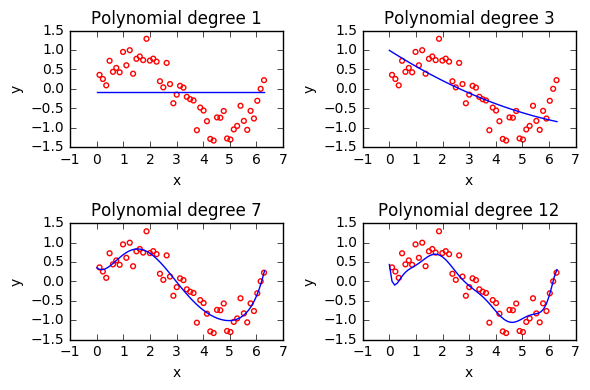

In [162]:
polynomial_regression()

# 2 Evaluating model predication performance


Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [248]:
def split_data(x, y, ratio, seed=1):
    """
    split the dataset based on the split ratio. If ratio is 0.8 
    you will have 80% of your data set dedicated to training 
    and the rest dedicated to testing
    """
    # set seed
    np.random.seed(seed)
    
    np.random.shuffle(x)
    np.random.shuffle(y)
    
    stop_idx = int(len(x) * 0.8)
    return x[0:stop_idx], y[0:stop_idx], x[stop_idx:], y[stop_idx:]

Then, test your `split_data` function below.

In [211]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees."""
    x_train, y_train, x_test, y_test = split_data(x, y, 0.8)
    
    poly_train = np.asarray(build_poly(x_train, degree))
    poly_test = np.asarray(build_poly(x_test, degree))

    _, weights = least_squares(y_train, poly_train)

    pred_train = poly_train.dot(weights)
    pred_test  = poly_test.dot(weights) 
    
    e_train = pred_train - y_train
    e_test  = pred_test  - y_test
    
    rmse_te = np.sqrt(2*(e_train**2).mean())
    rmse_tr = np.sqrt(2*(e_test**2).mean())
    
    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=ratio, d=degree, tr=rmse_tr, te=rmse_te))


In [212]:
seed = 6
degrees = [1, 3, 7, 12]
split_ratios = [0.9, 0.5, 0.1]

for split_ratio in split_ratios:
    for degree in degrees:
        train_test_split_demo(x, y, degree, split_ratio, seed)

proportion=0.9, degree=1, Training RMSE=0.888, Testing RMSE=1.028
proportion=0.9, degree=3, Training RMSE=1.122, Testing RMSE=0.921
proportion=0.9, degree=7, Training RMSE=0.914, Testing RMSE=0.964
proportion=0.9, degree=12, Training RMSE=1.227, Testing RMSE=0.779
proportion=0.5, degree=1, Training RMSE=1.077, Testing RMSE=0.982
proportion=0.5, degree=3, Training RMSE=0.935, Testing RMSE=0.990
proportion=0.5, degree=7, Training RMSE=1.443, Testing RMSE=0.920
proportion=0.5, degree=12, Training RMSE=1.347, Testing RMSE=0.743
proportion=0.1, degree=1, Training RMSE=0.930, Testing RMSE=1.019
proportion=0.1, degree=3, Training RMSE=1.331, Testing RMSE=0.923
proportion=0.1, degree=7, Training RMSE=1.308, Testing RMSE=0.951
proportion=0.1, degree=12, Training RMSE=1.501, Testing RMSE=0.769


# 3 Ridge Regression
Please fill in the function below.

In [250]:
def ridge_regression(y, tx, lambda_):
    """implement ridge regression."""

    lambda_prime = lambda_ / (2*tx.shape[0])
    a = inv(tx.transpose().dot(tx) + lambda_*np.eye(tx.shape[1]))
    
    b = tx.transpose().dot(y)
    w_star = a.dot(b)
    
    e = y - tx.dot(w_star)
    
    mse = np.asarray((e**2).mean())
    return mse, w_star

In [257]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    lambdas = np.logspace(-5, 0, 15)

    x_train, y_train, x_test, y_test = split_data(x, y, 0.8, seed=seed)
    
    poly_train = np.asarray(build_poly(x_train, degree))
    poly_test  = np.asarray(build_poly(x_test , degree))

    rmse_tr = []
    rmse_te = []
    
    for ind, lambda_ in enumerate(lambdas):
        _, weights = ridge_regression(y_train, poly_train, lambda_)

        pred_train = poly_train.dot(weights)
        pred_test  = poly_test.dot(weights) 

        rmse_tr.append(np.sqrt(2*((pred_train-y_train)**2).mean()))
        rmse_te.append(np.sqrt(2*((pred_test -y_test)**2) .mean()))
        
        print("proportion={p}, degree={d}, lambda={l:.3f}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
               p=ratio, d=degree, l=lambda_, tr=rmse_tr[ind], te=rmse_te[ind]))
        
    # Plot the obtained results
    plot_train_test(rmse_tr, rmse_te, lambdas, degree)


proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.967, Testing RMSE=0.982
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.967, Testing RMSE=0.982
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.967, Testing RMSE=0.982
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.967, Testing RMSE=0.982
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.967, Testing RMSE=0.984
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.968, Testing RMSE=0.995
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.968, Testing RMSE=1.027
proportion=0.5, degree=7, lambda=0.003, Training RMSE=0.969, Testing RMSE=1.080
proportion=0.5, degree=7, lambda=0.007, Training RMSE=0.970, Testing RMSE=1.131
proportion=0.5, degree=7, lambda=0.016, Training RMSE=0.972, Testing RMSE=1.152
proportion=0.5, degree=7, lambda=0.037, Training RMSE=0.973, Testing RMSE=1.133
proportion=0.5, degree=7, lambda=0.085, Training RMSE=0.976, Testing RMSE=1.080
proportion=0.5, degree=7, lambda=0.193, 

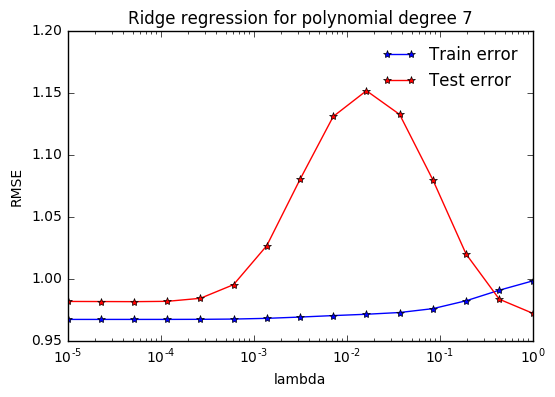

In [258]:
seed = 56
degree = 7
split_ratio = 0.5
ridge_regression_demo(x, y, degree, split_ratio, seed)